In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.io as sp
# from scipy.stats import expon, poisson, norm
# import statistics
# import pandas as pd
from math import exp, sqrt, floor
# import copy
# import random

In [3]:
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True

sns.set(style = 'whitegrid',context = 'notebook', 
        palette = 'dark', font_scale = 1.5)

# PROBLEM 1 Neuron with Autapse
Consider a neuron whose output feeds back onto itself via a synapse. (Such a synapse is often
called an “autapse”.) We assume that the neuron’s firing rate x, i.e., its average number of action
potentials per second, is given by the differential equation

$x˙(t) = −x(t) + f wx(t) + I$

where w = 0.04 is the strength of the synaptic connection and I = −2 is some constant, external
(and inhibitory) background input. The input-output (or activation) function of the neuron is given by
a sigmoidal function which we assume to be

$f(s) = 50(1 + tanh(s))$

where s is the total input to the neuron.
Programming Help: The hyperbolic tangent is defined as $tanh(x) = (e^x − e^{−x})/(e^x + e^{−x})$. In
Numpy you can use the function np.tanh().

# (a)
Plot the neuron’s activation function f(s) against s. Choose a suitable range of input

In [4]:
def activation(s):
  return 50*(1 + np.tanh(s)) 

activation = np.vectorize(activation)

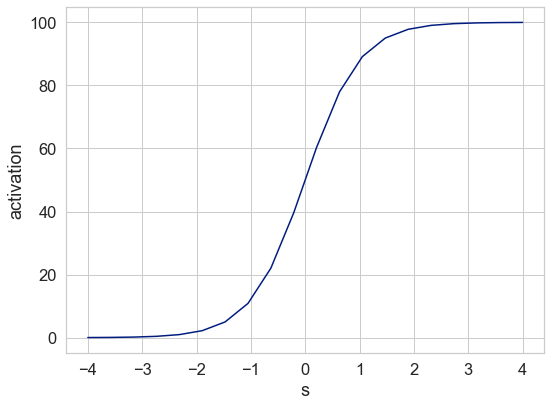

In [5]:
s = np.linspace(-4, 4, 20)

f = activation(s)

plt.plot(s,f)
plt.xlabel('s')
plt.ylabel('activation')
plt.savefig('fig1_p1_report4')

# (b)
Plot the derivatives x˙ as a function of the neuron’s firing rate x. What do the zero-crossings of
this plot indicate?

In [6]:
def autapse(xs, w, i):
    return -xs + activation(w *xs + i) 

autapse = np.vectorize(autapse)

In [7]:
def stable_unstable(d_x, xs):
    zeros = np.abs(d_x) < 0.2 
    fix_points = np.where(zeros == True)[0]
    stable = []
    unstable = []
    for i in fix_points:
        if d_x[i-1] > 0 and d_x[i+1] < 0:
            stable.append(xs[i])
        else:
            unstable.append(xs[i])
    return stable, unstable

def stable_arrows(stable, c):
    for i in stable:
        plt.annotate('', xy=(i, 0),
             xycoords='data',
             xytext=(i -10, 0),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color= c ,
                             lw=1.5,
                             )
           )
        plt.annotate('', xy=(i, 0),
             xycoords='data',
             xytext=(i +10, 0),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color=c,
                             lw=1.5,
                             )
           )
        
def unstable_arrows(unstable, c):
    for i in unstable:
        plt.annotate('', xy=(i-10, 0),
             xycoords='data',
             xytext=(i, 0),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color=c,
                             lw=1.5,
                             )
           )
        plt.annotate('', xy=(i + 10, 0),
             xycoords='data',
             xytext=(i, 0),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color= c,
                             lw=1.5,
                             )
           )

In [8]:
w = 0.04
I = -2
xs = np.linspace(0, 150, 300)

In [9]:
d_x = autapse(xs, w, I)

stable, unstable = stable_unstable(d_x, xs)

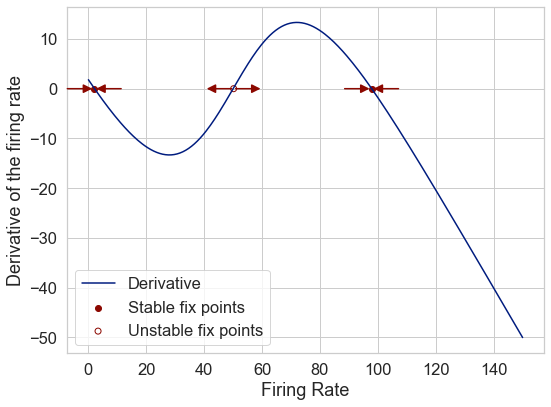

In [45]:
plt.plot(xs, d_x)

plt.scatter(stable, np.zeros(len(stable)), c ='r')
stable_arrows(stable, c = 'r')

plt.scatter(unstable, np.zeros(len(unstable)), facecolors='none', edgecolors='r')
unstable_arrows(unstable, c = 'r')

plt.ylabel('Derivative of the firing rate')
plt.xlabel('Firing Rate')

plt.legend(['Derivative', 'Stable fix points', 'Unstable fix points'])

plt.savefig('fig2_p1_report4')

# (c)
Simulate the system for different initial conditions, x(0) = 49, x(0) = 50, and x(0) =
51, using a time step dt = 0.1. Choose a reasonable value of T, What are the outcomes of these
simulations? Why?

$x(t+Δt)=(1−Δt)x(t)+f(wx(t)+I)Δt$

In [11]:
def autapse_euler(x_0,w, I, delta_t, T, sigma = None):
    y = np.zeros(int(T/delta_t))
    y[0] = x_0
    
    if sigma != None:
        for i in range(len(y)-1):
            noise = np.random.normal()
            termNoise = sigma * noise * sqrt(delta_t)
            y[i + 1] = (1-delta_t)*y[i] + activation(w * y[i] + I) * delta_t +termNoise
        return y
    else:
        for i in range(len(y)-1):
            y[i + 1] = (1-delta_t)*y[i] + activation(w * y[i] + I) * delta_t
        return y

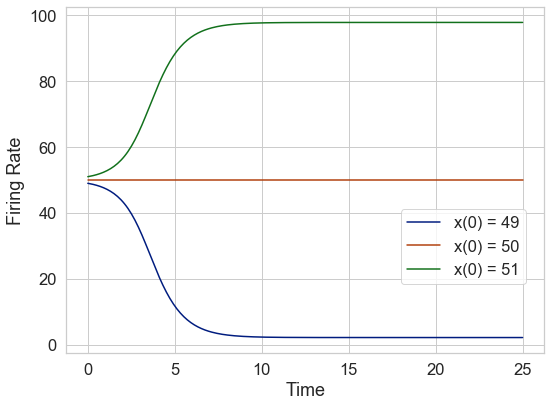

In [13]:
w = 0.04
I = -2
delta_t = 0.1
T = 25
x_zeros = [49, 50, 51]
x = np.linspace(0, T, T/delta_t)
legend = []
for i in x_zeros:
    y = autapse_euler(i, w, I, delta_t, T)
    plt.plot(x, y)
    legend.append(r'x(0) = {}'.format(i))
    
plt.xlabel('Time')
plt.ylabel('Firing Rate')
plt.legend(legend, loc = (0.7,0.2))

plt.savefig('fig3_p1_report4')

# (d)

(d) Redo the simulation of (c), but add a noise component to the system, so that

$x˙(t) = −x(t) + f(wx(t) + I) + ση(t)$

where η(t) is Gaussian white noise. What happens for a noise value of σ = 5? What happens if you
increase the noise (up to σ = 80)? Why

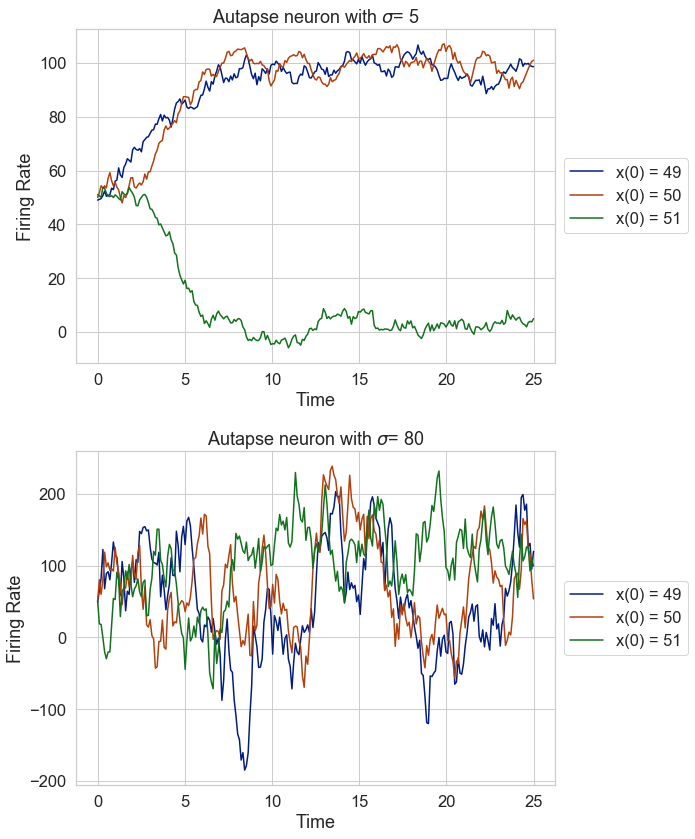

In [44]:
w = 0.04
I = -2
delta_t = 0.1
T = 25
x_zeros = [49, 50, 51]
x = np.linspace(0, T, T/delta_t)
legend = []

fig, ax = plt.subplots(2, figsize = (10,12))

sigmas = [5, 80]
for i,sigma in enumerate(sigmas):
    for x_0 in x_zeros:
        y = autapse_euler(x_0, w, I, delta_t, T, sigma = sigma)
        ax[i].plot(x, y)
        legend.append(r'x(0) = {}'.format(x_0))
        ax[i].legend(legend, loc='center left', bbox_to_anchor=(1, 0.5) )
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Firing Rate')
    ax[i].set_title('Autapse neuron with $\sigma$= {}'.format(sigma))
    
plt.savefig('fig4_p1_report4.png')